# IEOR 160 HW 4

## Imports

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import symbols, diff
from mpl_toolkits.mplot3d import Axes3D

## Problem 1

### CVX Optimized Solution

In [2]:
#Solution derived using CVX
#initializing the variables to be optimized
opt_x1 = cp.Variable(1)
opt_x2 = cp.Variable(1)
opt_x3 = cp.Variable(1)
#a**x = cp.exp(cp.multiply(np.log(a), x))
term1 = cp.exp(opt_x1 - 1)
term2 = cp.exp(-opt_x1 + 1)
term3 = cp.exp(opt_x2 - 2)
term4 = cp.exp(-opt_x2 + 2)
term5 = cp.exp(opt_x3 - 3)
term6 = cp.exp(-opt_x3 + 3)
term7 = cp.power(opt_x1 + opt_x2 + opt_x3, 4)
objective = term1 + term2 + term3 + term4 + term5 + term6 + term7
problem = cp.Problem(cp.Minimize(objective))
res = problem.solve()
print("CVX optimized solution: ")
print("x1: {0}\nx2: {1}\nx3: {2}".format(opt_x1.value[0], opt_x2.value[0], opt_x3.value[0]))

CVX optimized solution: 
x1: -0.6416469180116003
x2: 0.35835307796536126
x3: 1.358353073791011


### Gradient Algorithm Implementation

In [3]:
#write a function that handles a single step of gradient descent
#write a wrapper function that will call gradient descent maxIter number of times
def gradientMethod(lossFn, variables, alpha, beta, maxIter, initial, verbose=False):
    nextPos = initial
    pts = [nextPos]
    for i in range(maxIter):
        nextPos = oneIterGD(lossFn, variables, alpha, beta, nextPos)
        pts.append(nextPos)
        if verbose:
            print("iteration {0}: {1}".format(i, nextPos))
    return (pts, nextPos)
"""returns the next position from the gradient method"""
def oneIterGD(lossFn, variables, alpha, beta, x0):
    #TODO START
    gradient = []
    for v in variables:
        partial = diff(lossFn, v)
        for i in range(len(variables)):
            partial = partial.subs(variables[i], x0[i])
        gradient.append(partial)
    return np.add(x0, -np.array(gradient) * derived_stepsize)
    #TODO END

### Using the Gradient Algorithm to derive $\vec{x}$

In [4]:
x1 = symbols("x1")
x2 = symbols("x2")
x3 = symbols("x3")
lossFn = math.e**(x1 + 1) + math.e**(-x1 + 1) + math.e**(x2 - 2) + math.e**(-x2 + 2) + math.e**(x3 - 3) + math.e**(-x3 + 3) + (x1 + x2 + x3)**4
variables = [x1, x2, x3]
backtrack_param = 0.01
maxIter =31
initial = np.array([0,0,0])
pts, sol = gradientMethod(lossFn, variables, backtrack_param, maxIter, initial, False)
print("Gradient optimized solution: ")
print("x1: {0}\nx2: {1}\nx3: {2}".format(sol[0], sol[1], sol[2]))

Gradient optimized solution: 
x1: -0.635333880011007
x2: 0.397332029805657
x3: 1.28592104479798


### Plotting $|f(x^{*}) - f(x^{(i)})|$ in a log-linear plot

In [5]:
#using the gradient method to develop the difference graph as well as a plot of the vectors in 3d space
diff = []
f_x_opt = lossFn.subs(x1, opt_x1.value[0]).subs(x2, opt_x2.value[0]).subs(x3, opt_x3.value[0])
for p in pts:
    f_x_gd = lossFn.subs(x1, p[0]).subs(x2, p[1]).subs(x3, p[2])
    diff.append(abs(f_x_opt - f_x_gd))
print(diff)

[14.4512230614428, 10.3142235995267, 7.47880949238468, 5.54838853686629, 4.28909223704569, 3.47921624402420, 2.92849243993889, 2.51555690733503, 2.18028030654347, 1.89624082133344, 1.65114366495989, 1.43801653807766, 1.25201934491316, 1.08936338014259, 0.946919016095734, 0.822041679415264, 0.712472517622274, 0.616269960481006, 0.531757689547113, 0.457483275212180, 0.392184578583098, 0.334762111400934, 0.284256084023056, 0.239827195914895, 0.200740445584760, 0.166351398960014, 0.136094476499821, 0.109472911369870, 0.0860501014474586, 0.0654421322399763, 0.0473112899745303, 0.0313604170991297]


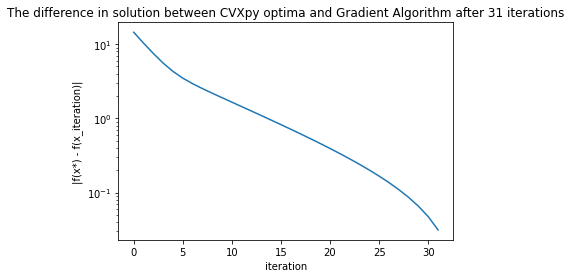

In [32]:
#plots for the absolute difference between f(x*) and f(x_iterations) for iterations 0 to 30 inclusive
plt.yscale("log")
plt.plot(diff);
plt.title("The difference in solution between CVXpy optima and Gradient Algorithm after 31 iterations");
plt.ylabel("|f(x*) - f(x_iteration)|");
plt.xlabel("iteration");

### Trajectory plot for all intermediate $x^{(i)}(t)$

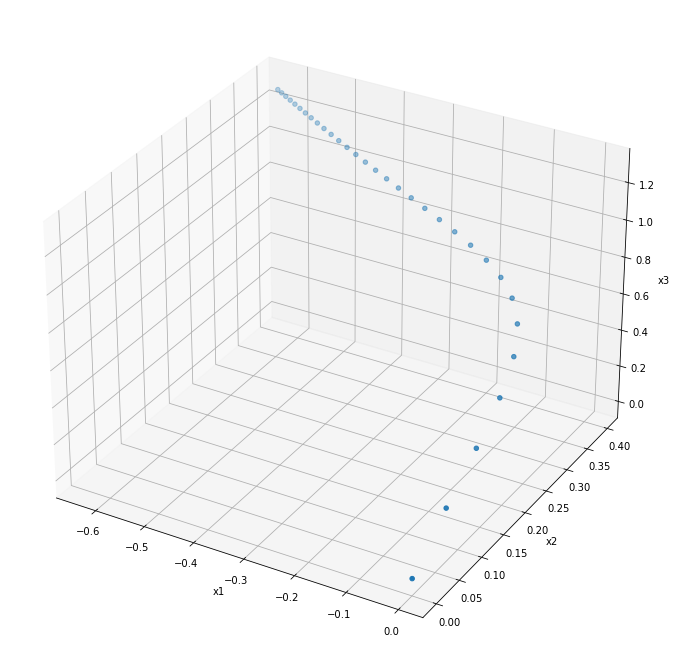

In [33]:
#plot for the 3d plot
splitted = list(zip(*pts))
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
# for i in range(len(splitted[0])):
#     ax.quiver(0, 0, 0, splitted[0][i], splitted[1][i], splitted[2][i])
ax.scatter(splitted[0], splitted[1], splitted[2])
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3");

## Problem 2